In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income-inequality/income_per_person_gdppercapita_ppp_inflation_adjusted.csv
/kaggle/input/income-inequality/investments_percent_of_gdp.csv
/kaggle/input/income-inequality/gini.csv
/kaggle/input/income-inequality/README.md
/kaggle/input/income-inequality/combined_final_last_10_years.csv
/kaggle/input/income-inequality/continent_country.csv
/kaggle/input/income-inequality/demox_eiu.csv
/kaggle/input/income-inequality/tax_revenue_percent_of_gdp.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/income-inequality/combined_final_last_10_years.csv")

In [5]:
df.head()

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
0,Africa,"Congo, Dem. Rep.",2006,27.6,605,14.6,6.83,42.2
1,Africa,"Congo, Dem. Rep.",2007,25.2,623,13.7,6.99,42.1
2,Africa,"Congo, Dem. Rep.",2008,22.8,640,10.9,8.97,42.1
3,Africa,"Congo, Dem. Rep.",2009,22.1,637,14.6,7.89,42.1
4,Africa,"Congo, Dem. Rep.",2010,21.5,660,28.8,8.35,42.1


In [6]:
print(df.shape)
print(df.columns.size, "cols")
df.columns

(1234, 8)
8 cols


Index(['continent', 'country', 'year', 'demox_eiu', 'income_per_person',
       'invest_%_gdp', 'tax_%_gdp', 'gini_index'],
      dtype='object')

In [7]:
df.describe()

,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2010.913290,62.083306,20520.390600,24.386224,16.768777,38.044084
std,3.083815,20.569704,19421.169132,7.957001,7.625846,8.391579
min,2006.000000,16.600000,605.000000,0.000000,0.043500,24.400000
25%,2008.000000,46.250000,5935.000000,19.500000,12.325000,32.100000
50%,2011.000000,64.900000,13700.000000,23.200000,15.900000,36.000000
75%,2014.000000,78.800000,31175.000000,27.700000,21.300000,42.575000
max,2016.000000,99.300000,120000.000000,67.900000,62.900000,63.900000


In [8]:
unique_continents = df['continent'].unique()
print("Total Continent Count:", unique_continents.size)
print(unique_continents)

unique_countries = df['country'].unique()
print("\nTotal Country Count:", unique_countries.size)

Total Continent Count: 5
['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']

Total Country Count: 138


In [9]:
print(df.groupby('continent').agg({'income_per_person': 'median'}))
print("\n")
print(df.groupby('continent').agg({'income_per_person': 'mean'}))

           income_per_person
continent                   
Africa                2940.0
Americas             12500.0
Asia                  8975.0
Europe               28500.0
Oceania              37600.0


           income_per_person
continent                   
Africa           6303.415730
Americas        15658.376963
Asia            19394.329268
Europe          31583.474178
Oceania         37840.909091


## Observation 1
1. The Pandas library is used to read csv file named "combined_final_last_10_years.csv"
2. This file contains data such as the economic condition of the countries across different continents that relate to income ineqaulity.
3. The information in the dataset is from 2006-2016 and its shape is (1234, 8)
4. The dataset contains
    - Total 138 countries from 5 different Continents. Here North and South America are reffered combinely as "Americas"
    - Parameters such as
      - **demox_eiu**: EIU(Economist Inteligence Unit) Democracy Index
      - **income_per_person**: Income: GDP per capita, constant PPP dollars
      - **invest_%\_gdp**: Investments (% of GDP)
      - **tax_%_gdp**: Tax revenue (% of GDP)
      - **gini_index**: The Gini Index is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents.

_NOTE: A higher Gini index signifies that income is distributed more unevenly, with a larger percentage of the total income held by a small portion of the population_

In [10]:
pivot_table = df.pivot_table(
    index='continent',
    columns='year',
    values='income_per_person',
    aggfunc='median'
)

pivot_table = pivot_table.loc[:]

pivot_table

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
continent,,,,,,,,,,,
Africa,4630.0,4590.0,4725.0,3800.0,2780.0,2740.0,2800.0,2750.0,2900.0,3000.0,2940.0
Americas,9860.0,10500.0,11700.0,11550.0,12150.0,12500.0,12900.0,12400.0,13000.0,13700.0,14350.0
Asia,6695.0,7260.0,7875.0,8350.0,9010.0,9120.0,9510.0,9650.0,10300.0,10750.0,10950.0
Europe,28400.0,29500.0,29400.0,27800.0,28400.0,27700.0,27100.0,27600.0,28400.0,29800.0,30600.0
Oceania,35950.0,36900.0,36950.0,36700.0,36850.0,37350.0,38050.0,38550.0,39150.0,39650.0,40150.0


In [11]:
grouped_df = df.groupby(['continent', 'year'], as_index=False)['income_per_person'].median()
grouped_df.head()

,continent,year,income_per_person
0,Africa,2006,4630.0
1,Africa,2007,4590.0
2,Africa,2008,4725.0
3,Africa,2009,3800.0
4,Africa,2010,2780.0


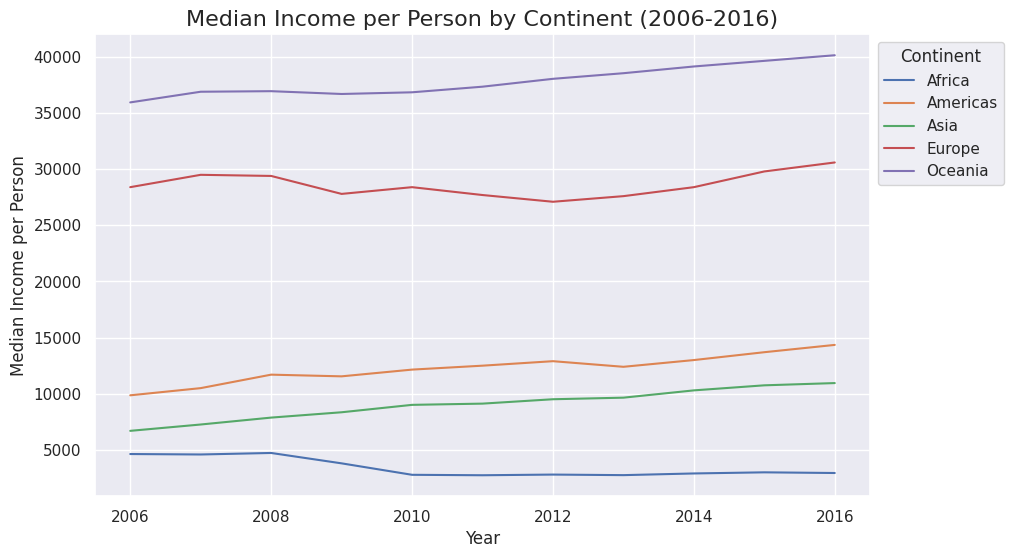

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x="year", y="income_per_person", hue="continent", data=grouped_df)

plt.title('Median Income per Person by Continent (2006-2016)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Income per Person', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()

In [13]:
grouped_gini = df.groupby(['continent', 'year'], as_index=False)['gini_index'].median()
grouped_gini.head()

,continent,year,gini_index
0,Africa,2006,40.95
1,Africa,2007,41.20
2,Africa,2008,42.05
3,Africa,2009,42.60
4,Africa,2010,42.50


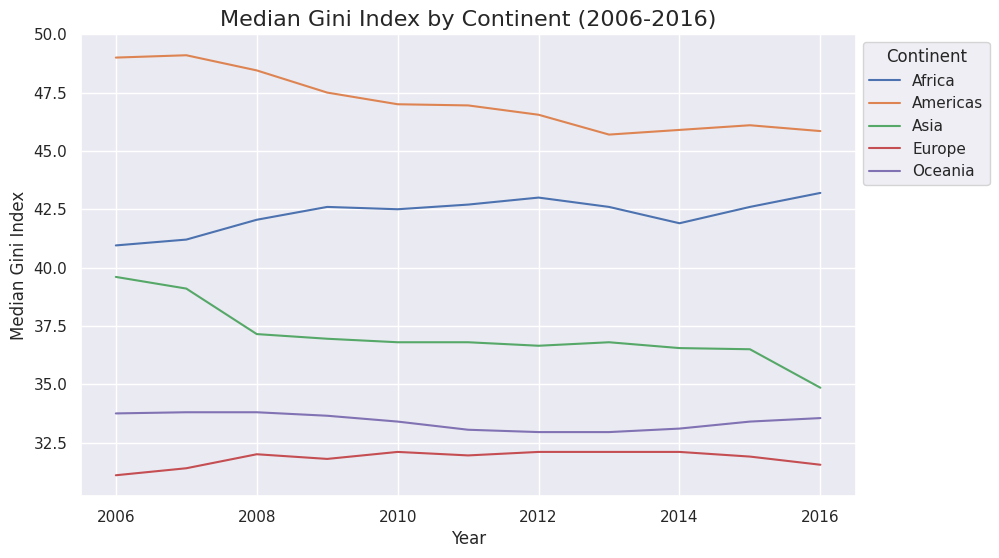

In [14]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="year", y="gini_index", hue="continent", data=grouped_gini)

plt.title('Median Gini Index by Continent (2006-2016)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Gini Index', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()

## Observation 2
1. From the `Median Income per Person by Continent` graph, we can conclude that the median income drastically increased for the people of Asia, Americas and Ocenia, while that for Europe increased a little and for the Africa, it decreased over the period of 10 years!
2. From the `Median Gini Index by Continents` graph, we see that the Gini Index drastically decresed for Americas and Asia, meanwhile it increased drastically for Africa. The Europe and The Oceania did not see any significant changes in their Gini Index.
3. Continent wise Break Down:
   1. **Africa**: The data suggests that an average person in Africa earns less in 2016 as compared to 2006, but the Gini Index suggests that the concentration of wealth by a few people has aggressively increased.
   2. **Americas**: The data suggests that an average person in the Americas earns more in 2016 as compared to 2006, and according to the Gini Index, income inequality is on decline.
   3. **Asia**: The data suggests that an average person in the Asia earns more in 2016 as compared to 2006, and according to the Gini Index, Aisa experienced the steepest decline in income inequality among all the continents.
   4. **Europe**: The data suggests that an average person in the Europe earns more in 2016 as compared to 2006, and according to the Gini Index, income inequality in 2016 is nearly as it was in 2006.
   5. **Oceania**: The data suggests that an average person in the Oceania earns more in 2016 as compared to 2006, and according to the Gini Index, income inequality in 2016 is nearly as it was in 2006.

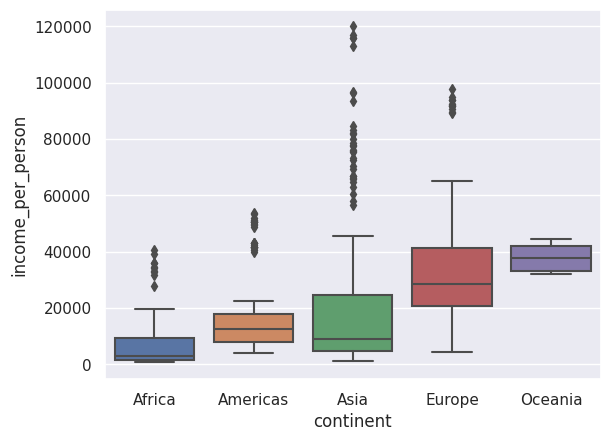

In [16]:
sns.boxplot(x='continent', y='income_per_person', data=df)
plt.show()

### Observation
1. Africa has the lowest income levels with many people earning very little.
   - The box is very close to the bottom, indicating low income levels for most people.
   - A few outliers have significantly higher incomes, but the majority are low.
3. Asia and Americas have large income disparities (rich vs. poor gap is significant).
   - The interquartile range (IQR) for Asia is quite large, meaning income varies significantly.
   - Many outliers in both continents suggest some individuals earn significantly more than the rest.
4. Europe has a higher and more balanced income compared to Asia and Africa.
   - The median is higher compared to Africa, Asia, and the Americas.
   - The income spread is also wider, but not as extreme as in Asia.
6. Oceania has the highest and most consistent income levels, suggesting better economic equality.
   - The box is small, meaning income levels are less variable (less inequality).
   - Fewer extreme outliers, suggesting more consistency in income.

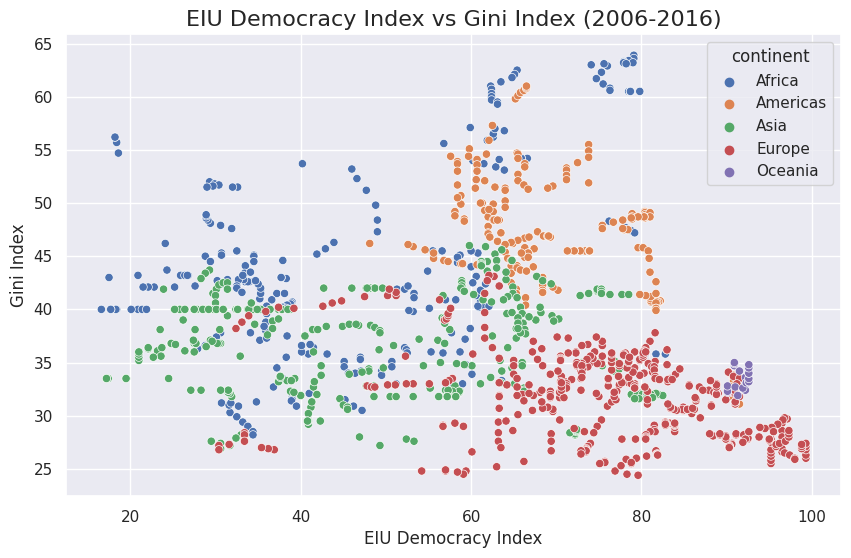

In [57]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="demox_eiu", y="gini_index", data=df, hue="continent")  # hue="year"

plt.title('EIU Democracy Index vs Gini Index (2006-2016)', fontsize=16)
plt.xlabel('EIU Democracy Index', fontsize=12)
plt.ylabel('Gini Index', fontsize=12)

plt.show()

### Observation
1. Most of the countries with lower EIU Democracy Index(<= 40) usually have Gini Index >= 35
2. The Highest Gini Index can be found in the countries with EIU Democracy Index 60 <= x <= 80
3. Countries with better quality of democracies, according to EIU Democracy Index >= 80, have Gini Index <= 35

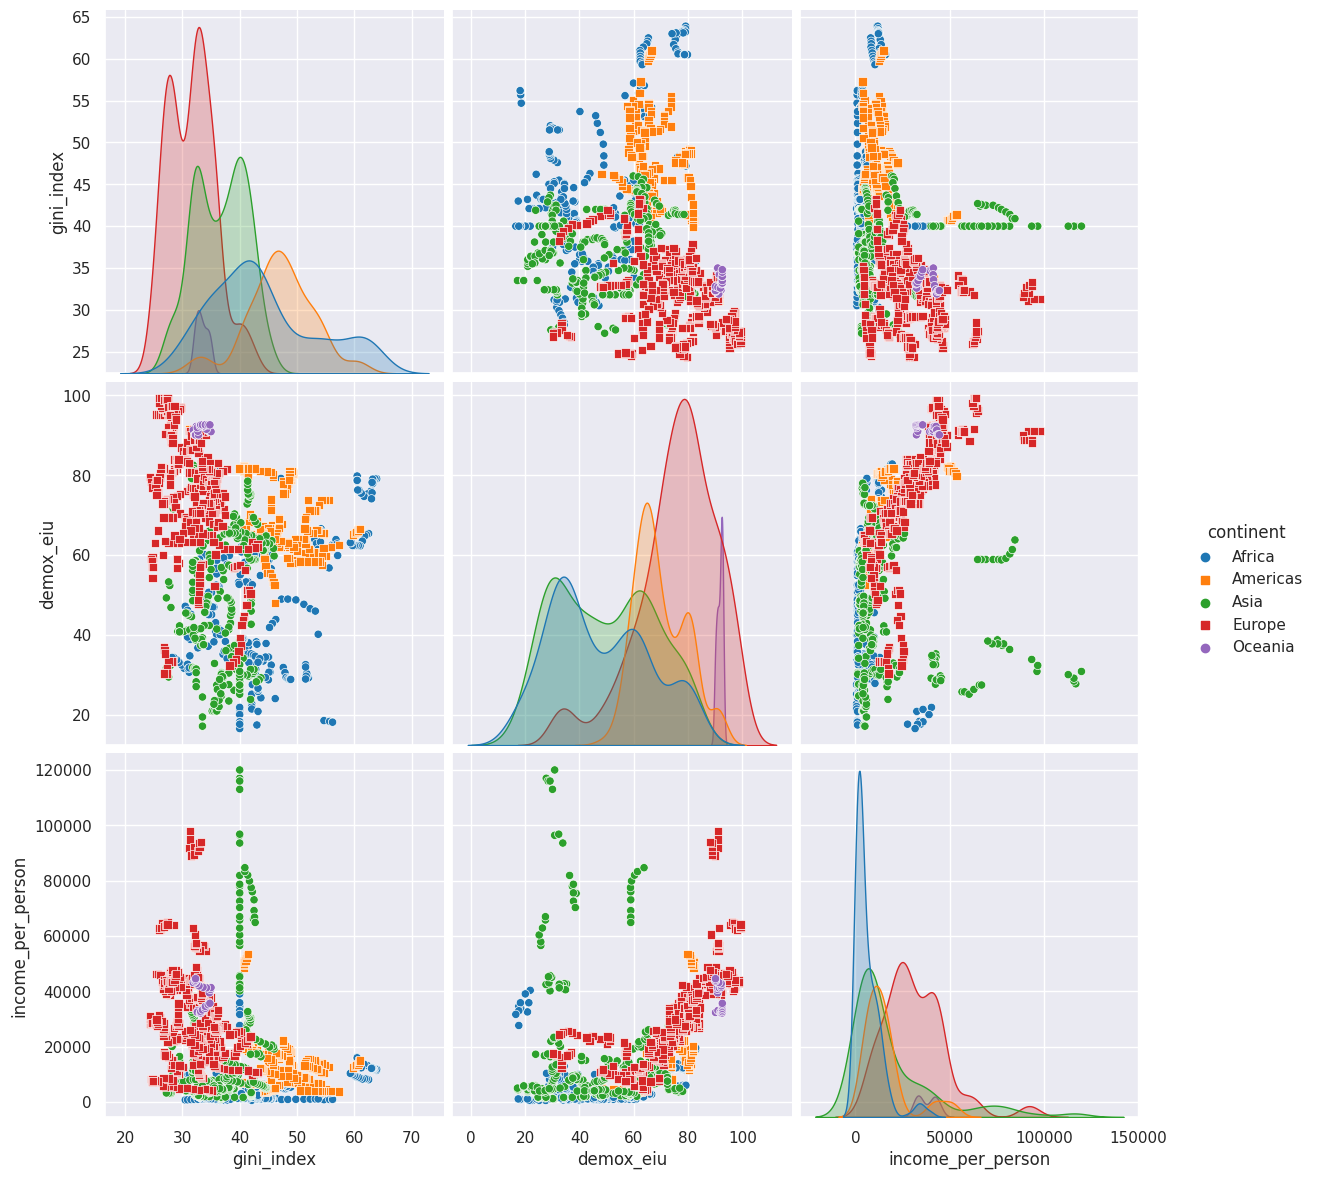

In [55]:
sns.pairplot(df, 
    vars=['gini_index', 'demox_eiu', 'income_per_person'], 
    hue='continent',
    markers=['o', 's'],
    palette='tab10',
    size=4
)
plt.show()

### Observation
1. Income vs. Gini Index (Income Inequality)<br>
   Negative correlation: Higher income per person tends to be associated with a lower Gini index (less inequality).
   - Asia (red squares) and Africa (blue dots) have a wider range of Gini index values, with some countries having high inequality.
   - Europe (green circles) and Oceania (purple dots) generally have lower inequality (lower Gini index).
2. Income vs. Democracy Index<br>
   Positive correlation: Countries with higher democracy index tend to have a higher income.
   - Africa and Asia show lower democracy index values, with many countries below 50.
   - Europe and Oceania have higher democracy scores, clustering around 60+.
3. Gini Index vs. Democracy Index<br>
   Negative correlation: Countries with higher democracy scores tend to have lower inequality.
   - Americas, Africa and Asia have higher Gini index values despite variations in democracy levels.
   - Europe and Oceania have lower Gini index values and higher democracy scores, meaning that democratic nations tend to have more economic equality.
4. Density Distributions<br>
   - Income distribution: Oceania and Europe have higher income peaks, while Africa and Asia have lower-income distributions.
   - Gini index distribution: Africa and Asia have a broader spread, showing greater inequality variability.

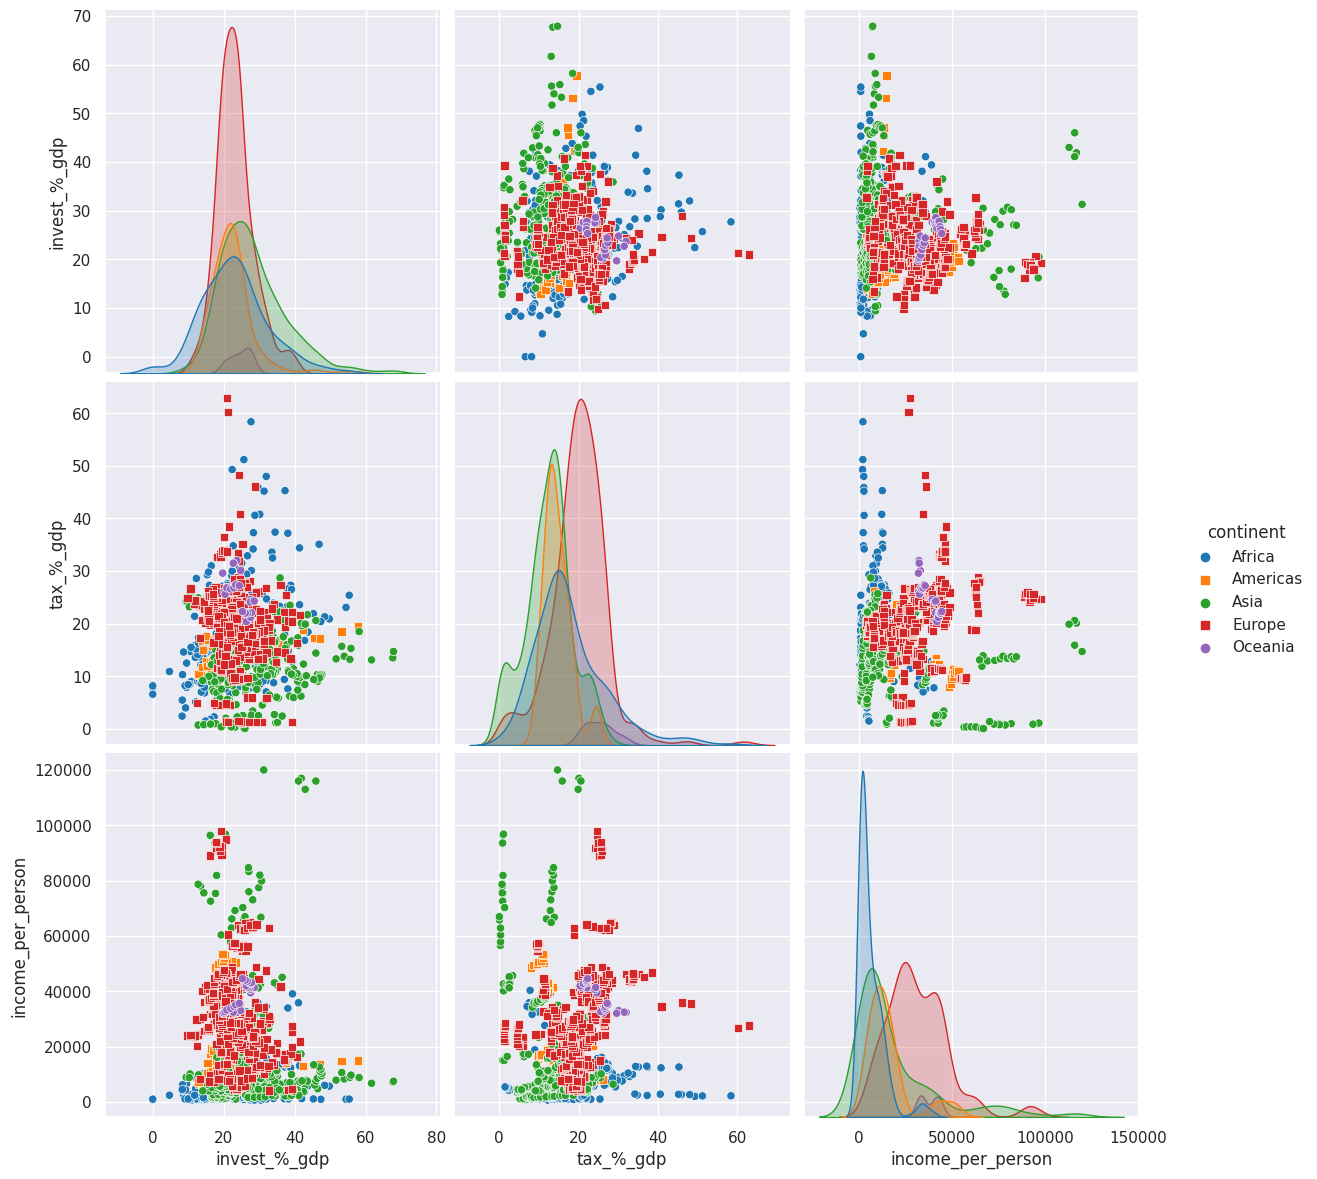

In [17]:
sns.pairplot(df, 
    vars=['invest_%_gdp', 'tax_%_gdp', 'income_per_person'], 
    hue='continent',
    markers=['o', 's'],
    palette='tab10',
    size=4
)
plt.show();

### Observations
1. Investment (% GDP) vs. Income per Person<br>
   No strong correlation is visible—higher investment as % of GDP does not always mean higher income.
   - Asia (red squares) and Africa (blue dots) show a broad range of investment percentages, but mostly low income per person.
   - Europe (green circles) and Oceania (purple dots) have a higher concentration of high-income countries.
2. Tax (% GDP) vs. Income per Person<br>
   Weak negative correlation: Countries with lower tax % of GDP in some cases tend to have higher income per person.
   - Europe has low tax percentages and comparitively higher income per person, suggesting a strong taxation system.
   - Africa and Asia have low tax % GDP and lower income per person, indicating weaker taxation structures.
3. Investment (% GDP) vs. Tax (% GDP)<br>
   No clear trend—countries with high tax % GDP don't necessarily invest more.
   - Europe shows slightly higher tax percentages with moderate investments, while Africa and Asia have more scattered points.
4. Density Distributions
   - Investment % GDP: Asia has a wide range, while other continents have a narrower distribution.
   - Tax % GDP: Europe has a higher peak, indicating many countries with high taxation.
   - Income per person: Africa and Asia have lower peaks, while Europe and Oceania dominate the higher end.

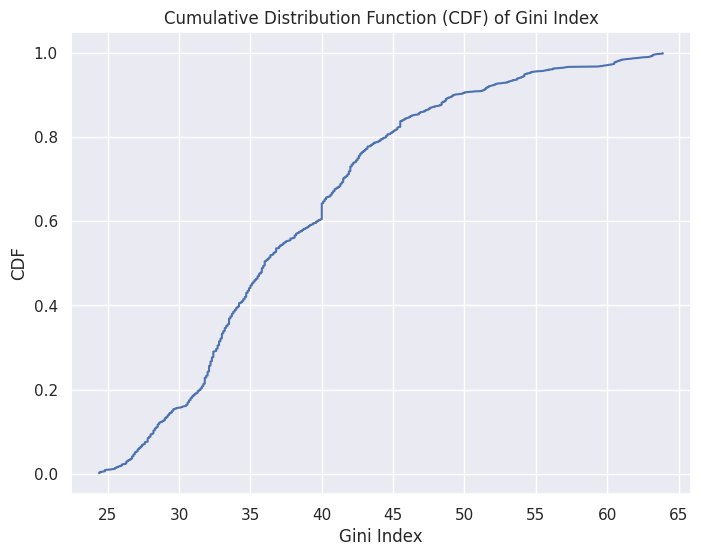

In [33]:
data = df['gini_index'].dropna()
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(8, 6))
# plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.plot(sorted_data, cdf)
plt.xlabel('Gini Index')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Gini Index')
plt.grid(True)

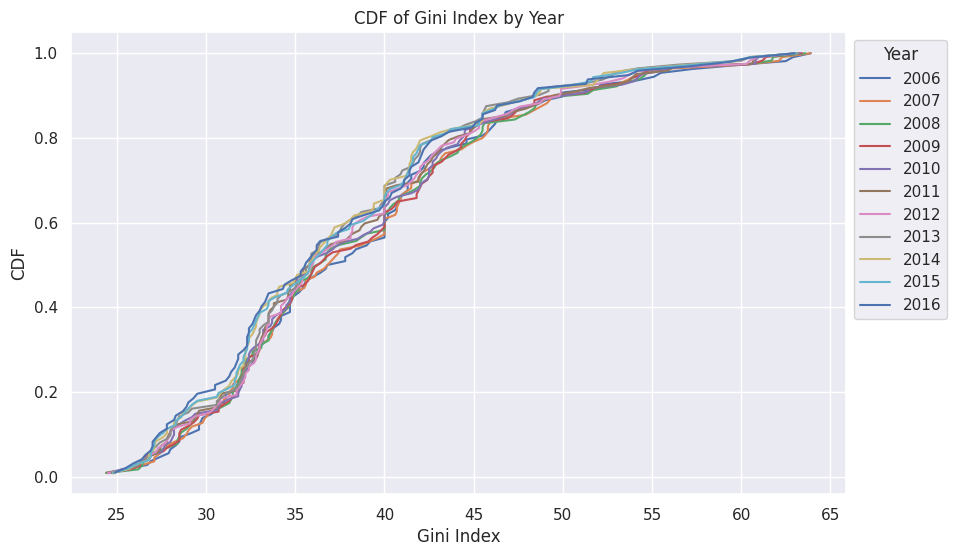

In [19]:
plt.figure(figsize=(10, 6))
for year in df['year'].unique():
    year_data = df[df['year'] == year]['gini_index'].dropna()
    sorted_data = np.sort(year_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=year)

plt.xlabel('Gini Index')
plt.ylabel('CDF')
plt.title('CDF of Gini Index by Year')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

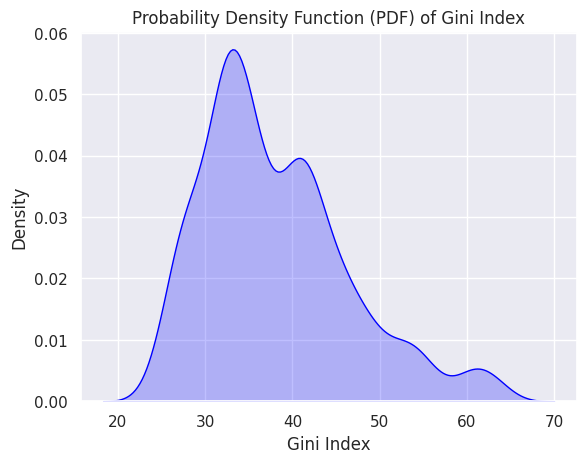

In [40]:
sns.kdeplot(df['gini_index'], fill=True, color='blue')
plt.xlabel('Gini Index')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Gini Index')
plt.show()

## Observations
### CDF:
- The curve rises steeply between Gini index values of 25 to 40, indicating that a large proportion of the data points (country-year observations) have Gini indices in this range.
- The curve becomes flatter after a Gini index of 40, suggesting that fewer observations have higher inequality levels.
- 50th Percentile (Median): The Gini index corresponding to the 50th percentile (where the CDF reaches 0.5) is approximately 35. This means, 50% of the country-year observations have a Gini index <= 35, indicating that half of the country-year combinations have relatively low inequality.
- 75th Percentile: The Gini index corresponding to the 75th percentile (where the CDF reaches 0.75) is approximately 45. This means, 75% of the country-year observations have a Gini index <= 45, indicating moderate inequality levels.
- 90th Percentile: The Gini index corresponding to the 90th percentile (where the CDF reaches 0.9) is approximately 55. This means, 90% of the country-year observations have a Gini index <= 55, indicating relatively high inequality levels.

## PDF:
1. Peak Around 30-35:
    - The most common Gini Index values fall around 30 to 35.
    - This suggests that many countries have a moderate level of income inequality.
2. Right-Skewed Distribution:
    - The long tail towards 60+ suggests fewer countries with extremely high income inequality.
    - These could be countries with large wealth gaps.
3. Bimodal Shape (Two Peaks):
    - The first peak around 30-35 represents many countries with relatively lower inequality.
    - The second, smaller peak around 40-45 may indicate another group of countries with higher inequality.

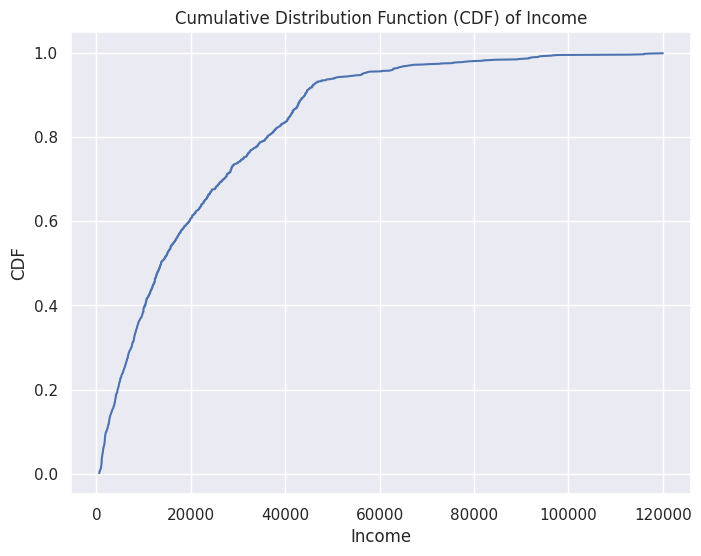

In [53]:
data = df['income_per_person'].dropna()
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf)
plt.xlabel('Income')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Income')
plt.grid(True)

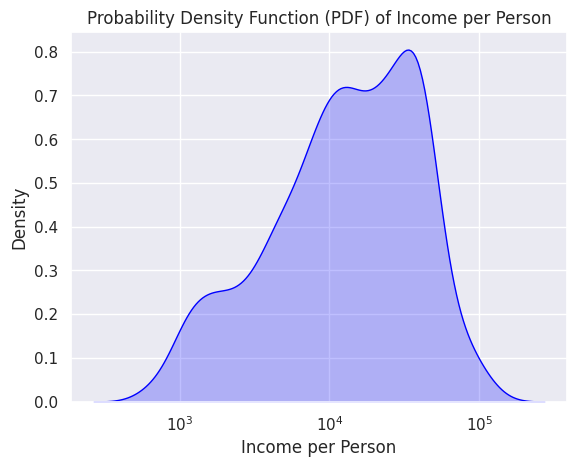

In [52]:
sns.kdeplot(df['income_per_person'], fill=True, color='blue', log_scale=True) # need to use a log scale
plt.xlabel('Income per Person')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Income per Person')
plt.show()

## Observations
### CDF:
- The curve rises steeply between income values of 0 to 40,000, indicating that a large proportion of the data points (country-year observations) have incomes in this range.
- The curve becomes flatter after an income of 40,000, suggesting that fewer observations have higher income levels.
- 50th Percentile (Median): The income corresponding to the 50th percentile (where the CDF reaches 0.5) is approximately 30,000. This means, 50% of the country-year observations have an income <= 30,000, indicating that half of the country-year combinations have relatively low income.
- 75th Percentile: The income corresponding to the 75th percentile (where the CDF reaches 0.75) is approximately 60,000. This means, 75% of the country-year observations have an income <= 60,000.
- 90th Percentile: The income corresponding to the 90th percentile (where the CDF reaches 0.9) is approximately 90,000. This means, 90% of the country-year observations have an income <= 90,000.
- Most countries/years have low to moderate income: The steep rise in the CDF at lower income values suggests that most observations have relatively low income (Income ≤ 60,000).
- High income (observed in 25% of the data) is less common: The flatter part of the curve at higher income values (Income > 60,000) suggests that high income is less common in the dataset.

### PDF:
1. Logarithmic Scale on X-Axis:
   - The income values are plotted on a logarithmic scale, meaning income differences are exponential.
   - This helps in visualizing income distributions across vastly different economic conditions.
2. Peak Around 10⁴ (~10,000):
   - Most countries have an income per person around 10,000 units.
   - This could represent middle-income countries.
3. Right-Skewed Distribution:
   - The long tail to the right suggests a few countries have extremely high income levels.
   - These are likely wealthy nations with high GDP per capita.
4. Dip Around 10³ (~1,000):
   - There's a slight dip in density at lower income levels (~1,000), meaning fewer countries fall into extreme poverty.

# Observations: Mean, Variance and STD

In [23]:
array = np.array(df["gini_index"])
meanofOperationAge = np.mean(array)
print("Mean of Gini Index: ", meanofOperationAge)
stdofOperationAge = np.std(array)
print("Standard deviation of Gini Index: ", stdofOperationAge)

Mean of Gini Index:  38.04408427876823
Standard deviation of Gini Index:  8.388177690763793


In [25]:
array = np.array(df["income_per_person"])
meanofaffectedNodes = np.mean(array)
print("Mean of income per person: ",meanofaffectedNodes)
stdofaffectedNodes= np.std(array)
print("Standard deviation of income per person: ",stdofaffectedNodes)

Mean of income per person:  20520.39059967585
Standard deviation of income per person:  19413.298343452745


In [29]:
array = np.array(df["gini_index"])
print("Median of Gini index: ", np.median(array))
print("Quantile of Gini index", np.percentile(array,np.arange(25,101,25)))
print("90th percentile of Gini index", np.percentile(array, 90))

Median of Gini index:  36.0
Quantile of Gini index [32.1   36.    42.575 63.9  ]
90th percentile of Gini index 49.2


In [30]:
from statsmodels import robust as rb
array = np.array(df["gini_index"])
MADofOperationAge = rb.mad(array)
print(MADofOperationAge)

7.561271314378572


## Observation
### Gini Index:
- The mean Gini index is 38.04, indicating moderate income inequality.
- The distribution is slightly spread (std = 8.39).
- The median (36.0) is lower than the mean, suggesting right-skewness (a few countries have very high inequality).
- MAD - Median of Absolute Deviation works same as like the standard deviation. STD refered as how far each sample point from "mean". Whereas, MAD indicates how far every sample point is away from the "median", here MAD value 7.56 indicates the absolute distance from the median value

### Income per Person:
- The mean income per person is $20,520.39.
- High standard deviation (19,413.30) suggests wide variation in income levels among countries.